# EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import snscrape.modules.twitter as sntwitter
from pathlib import Path  
import re
import string
from transformers import AutoTokenizer
#add package
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from textblob import TextBlob
from itertools import cycle, islice


In [2]:
# requirements 
# wordcloud
# scipy
# transformers
# tqdm
# matplotlib
# nltk
#textblob

In [3]:
vaccine_df_2020_2021 = pd.read_csv(r'data/vaccine_output_2020_2021.csv')

#vaccine_df_2021_2022 = pd.read_csv(r'data/vaccine_output_2021_2022.csv')

In [4]:
vaccine_df_2020_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  996 non-null    int64 
 1   Date        996 non-null    object
 2   User        996 non-null    object
 3   Tweet       996 non-null    object
 4   Tweet_URL   996 non-null    object
 5   Location    785 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.8+ KB


In [5]:
print(vaccine_df_2020_2021.shape)

(996, 6)


In [6]:
vaccine_df_2020_2021.head()

,Unnamed: 0,Date,User,Tweet,Tweet_URL,Location
0,0,2021-12-07 23:58:57+00:00,TPedherney,In line to get my booster #vaccine #Booster #P...,https://twitter.com/TPedherney/status/14683694...,"Burlington, ON"
1,1,2021-12-07 23:32:39+00:00,cwillits30,Officially boosted! First done of Moderna afte...,https://twitter.com/cwillits30/status/14683628...,"Phoenix, AZ"
2,2,2021-12-07 23:29:36+00:00,MA_CEAL,#COVIDMythBustingTuesdays! Myth: Doesn’t the #...,https://twitter.com/MA_CEAL/status/14683620841...,"Boston, Massachusetts"
3,3,2021-12-07 23:08:19+00:00,WebAeneas,#vaccinated another great idea you can sue any...,https://twitter.com/WebAeneas/status/146835672...,NaN
4,4,2021-12-07 23:02:41+00:00,TheAmirImani,"I don't know if this is a ""3 dose #vaccine"" or...",https://twitter.com/TheAmirImani/status/146835...,Toronto


In [7]:
vaccine_df_2020_2021.isna().sum()

Unnamed: 0      0
Date            0
User            0
Tweet           0
Tweet_URL       0
Location      211
dtype: int64

In [8]:
vaccine_df_2020_2021['Date'] = pd.to_datetime(vaccine_df_2020_2021['Date']).dt.date  #converting date column to date format
vaccine_df_2020_2021.head()

,Unnamed: 0,Date,User,Tweet,Tweet_URL,Location
0,0,2021-12-07,TPedherney,In line to get my booster #vaccine #Booster #P...,https://twitter.com/TPedherney/status/14683694...,"Burlington, ON"
1,1,2021-12-07,cwillits30,Officially boosted! First done of Moderna afte...,https://twitter.com/cwillits30/status/14683628...,"Phoenix, AZ"
2,2,2021-12-07,MA_CEAL,#COVIDMythBustingTuesdays! Myth: Doesn’t the #...,https://twitter.com/MA_CEAL/status/14683620841...,"Boston, Massachusetts"
3,3,2021-12-07,WebAeneas,#vaccinated another great idea you can sue any...,https://twitter.com/WebAeneas/status/146835672...,NaN
4,4,2021-12-07,TheAmirImani,"I don't know if this is a ""3 dose #vaccine"" or...",https://twitter.com/TheAmirImani/status/146835...,Toronto


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'London, England'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'UK'),
  Text(4, 0, 'England, United Kingdom'),
  Text(5, 0, 'India'),
  Text(6, 0, 'United Kingdom'),
  Text(7, 0, 'South Africa'),
  Text(8, 0, 'Chicago, IL'),
  Text(9, 0, 'Washington, DC'),
  Text(10, 0, 'Ottawa, Ontario'),
  Text(11, 0, 'Earth'),
  Text(12, 0, 'New Delhi, India'),
  Text(13, 0, 'New York, NY'),
  Text(14, 0, 'Los Angeles, CA'),
  Text(15, 0, 'Free CH Resources'),
  Text(16, 0, 'Pretoria, South Africa'),
  Text(17, 0, 'Scotland'),
  Text(18, 0, 'Engadine'),
  Text(19, 0, 'Mumbai, India')])

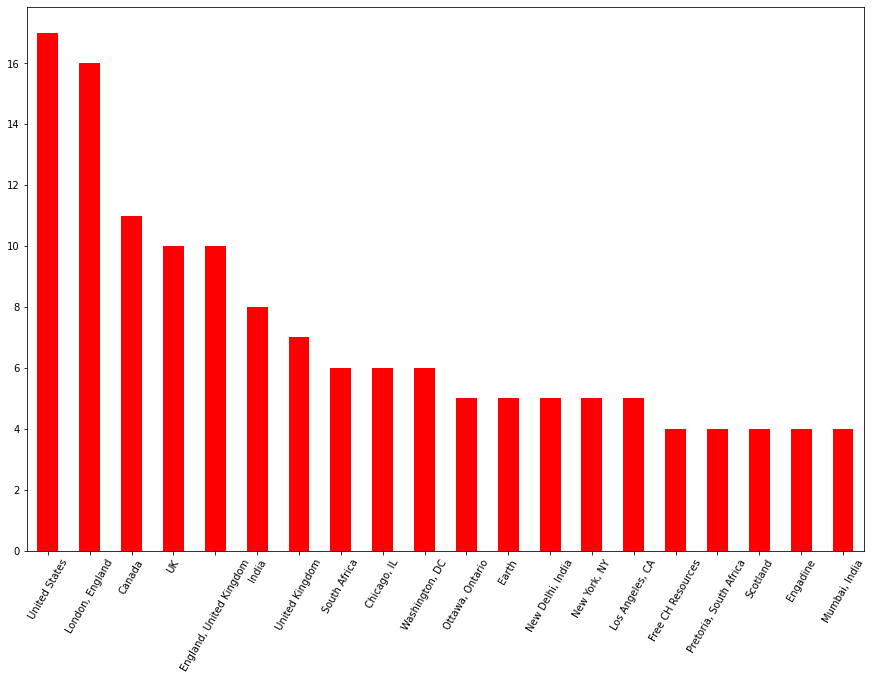

In [9]:


# Visulizing Tweet Count vs Location  
plt.figure(figsize=(15,10))
vaccine_df_2020_2021['Location'].value_counts().nlargest(20).plot(kind='bar', color="red")
plt.xticks(rotation=60)

### PREPROCESSING TWEETS

In [10]:
lemma = nltk.stem.WordNetLemmatizer()
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
sample = "I am not very happy about the vaccination"
tokens = nltk.tokenize.word_tokenize(sample.lower())
words = [t for t in tokens if t not in stop_words]
lemmatize = [lemma.lemmatize(w) for w in words]
print(words)

['happy', 'vaccination']


"I am not very happy about the vacination" is a negative sentance , the nltk stopwords contain words negative and positive words in its stopwords corpus . removing the stop words using this would affect our sentiment analysis . Since the given sentance carries a negative sentiment but after lemmatizing it we get a positive words.

In [12]:
# clean and filter using SPARK
def preprocessing(df):
    location_df = df['Location']
    #tweet_lower_df = df['Tweet'].str.lower()
    EMOJI_PATTERN = re.compile( \
                           "[" \
                           "\U0001F1E0-\U0001F1FF"  \
                           "\U0001F300-\U0001F5FF"  \
                           "\U0001F600-\U0001F64F"  \
                           "\U0001F680-\U0001F6FF"  \
                           "\U0001F700-\U0001F77F" \
                           "\U0001F780-\U0001F7FF" \
                           "\U0001F800-\U0001F8FF" \
                           "\U0001F900-\U0001F9FF" \
                           "\U0001FA00-\U0001FA6F" \
                           "\U0001FA70-\U0001FAFF" \
                           "\U00002702-\U000027B0" \
                           "\U000024C2-\U0001F251" \
                           "]+")
    
    tweet_whitespace_df = df['Tweet'].replace(r'\s+',' ',regex=True)
    #tweet_emoji_df = tweet_whitespace_df.replace(EMOJI_PATTERN,'',regex = True)
    tweet_hashtag_df = tweet_whitespace_df.replace(r'#','',regex=True)
    tweet_numbers_df = tweet_hashtag_df.replace(r'[0-9]+', '', regex = True)
    tweet_amp_df = tweet_numbers_df.replace(r'&amp;', '', regex = True)
    tweet_reply_df = tweet_amp_df.replace(r'@[^\s]+', '', regex = True)
    
    #tweet_punc_df = tweet_numbers_df.replace(r'[^\w\s]', '', regex = True)
    
    
    location_whitespace_df =  location_df.replace(r'\s+',' ',regex=True)
    location_hashtag_df = location_whitespace_df.replace(r'#','',regex=True)
    location_numbers_df = location_hashtag_df.replace(r'[0-9]+','',regex=True)
    location_emoji_df = location_numbers_df.replace(EMOJI_PATTERN,'',regex = True)
    PUNCT_MODIFIED = r'[.|!|#|\"|$|%|\'|\(|\)|*|+|=|<|>|~|\{|\}|\\|/|:|;|\?|@|\[|^|_|\`|\]]'
    location_punc_df = location_emoji_df.replace(PUNCT_MODIFIED,'',regex = True)
    return tweet_reply_df,location_punc_df


In [13]:
vaccine_20_21_cleanedDF = vaccine_df_2020_2021
vaccine_20_21_cleanedDF['Processed_Tweet'],vaccine_20_21_cleanedDF['Location'] = preprocessing(vaccine_df_2020_2021)
vaccine_20_21_cleanedDF['Location'] = vaccine_20_21_cleanedDF['Location'].fillna('')
vaccine_20_21_cleanedDF

,Unnamed: 0,Date,User,Tweet,Tweet_URL,Location,Processed_Tweet
0,0,2021-12-07,TPedherney,In line to get my booster #vaccine #Booster #P...,https://twitter.com/TPedherney/status/14683694...,"Burlington, ON",In line to get my booster vaccine Booster Pfizer
1,1,2021-12-07,cwillits30,Officially boosted! First done of Moderna afte...,https://twitter.com/cwillits30/status/14683628...,"Phoenix, AZ",Officially boosted! First done of Moderna afte...
2,2,2021-12-07,MA_CEAL,#COVIDMythBustingTuesdays! Myth: Doesn’t the #...,https://twitter.com/MA_CEAL/status/14683620841...,"Boston, Massachusetts",COVIDMythBustingTuesdays! Myth: Doesn’t the CO...
3,3,2021-12-07,WebAeneas,#vaccinated another great idea you can sue any...,https://twitter.com/WebAeneas/status/146835672...,,vaccinated another great idea you can sue anyo...
4,4,2021-12-07,TheAmirImani,"I don't know if this is a ""3 dose #vaccine"" or...",https://twitter.com/TheAmirImani/status/146835...,Toronto,"I don't know if this is a "" dose vaccine"" or a..."
...,...,...,...,...,...,...,...
991,995,2021-12-04,AnoopChathoth,#Kerala has 1707 teaching and non teaching sta...,https://twitter.com/AnoopChathoth/status/14669...,Bangalore Kannur Wayanad,Kerala has teaching and non teaching staff wh...
992,996,2021-12-04,nemahinemla,Nisqually Indian Tribe mandates #CovidVaccine ...,https://twitter.com/nemahinemla/status/1466985...,Nisqually,Nisqually Indian Tribe mandates CovidVaccine f...
993,997,2021-12-04,DonielOediv,i feel like throwing up 52 hours after taking ...,https://twitter.com/DonielOediv/status/1466984...,nz,i feel like throwing up hours after taking se...
994,998,2021-12-04,billlionnaire,What Covid denial don't get it. They have had ...,https://twitter.com/billlionnaire/status/14669...,,What Covid denial don't get it. They have had ...


In [14]:
#Rearrange columns
col_list = vaccine_20_21_cleanedDF.columns.tolist()
cols = col_list[:-3] + col_list[-1:] + col_list[4:6]
vaccine_20_21_cleanedDF = vaccine_20_21_cleanedDF[cols]
vaccine_20_21_cleanedDF = vaccine_20_21_cleanedDF.rename({'Unnamed: 0': 'ID'}, axis=1) 
vaccine_20_21_cleanedDF.columns.tolist()

['ID', 'Date', 'User', 'Tweet', 'Processed_Tweet', 'Tweet_URL', 'Location']

In [15]:
vaccine_20_21_cleanedDF.to_csv(r'data/new_processed.csv', encoding='utf-8')

In [16]:
vaccine_20_21_cleanedDF.head()

,ID,Date,User,Tweet,Processed_Tweet,Tweet_URL,Location
0,0,2021-12-07,TPedherney,In line to get my booster #vaccine #Booster #P...,In line to get my booster vaccine Booster Pfizer,https://twitter.com/TPedherney/status/14683694...,"Burlington, ON"
1,1,2021-12-07,cwillits30,Officially boosted! First done of Moderna afte...,Officially boosted! First done of Moderna afte...,https://twitter.com/cwillits30/status/14683628...,"Phoenix, AZ"
2,2,2021-12-07,MA_CEAL,#COVIDMythBustingTuesdays! Myth: Doesn’t the #...,COVIDMythBustingTuesdays! Myth: Doesn’t the CO...,https://twitter.com/MA_CEAL/status/14683620841...,"Boston, Massachusetts"
3,3,2021-12-07,WebAeneas,#vaccinated another great idea you can sue any...,vaccinated another great idea you can sue anyo...,https://twitter.com/WebAeneas/status/146835672...,
4,4,2021-12-07,TheAmirImani,"I don't know if this is a ""3 dose #vaccine"" or...","I don't know if this is a "" dose vaccine"" or a...",https://twitter.com/TheAmirImani/status/146835...,Toronto


(-0.5, 399.5, 199.5, -0.5)

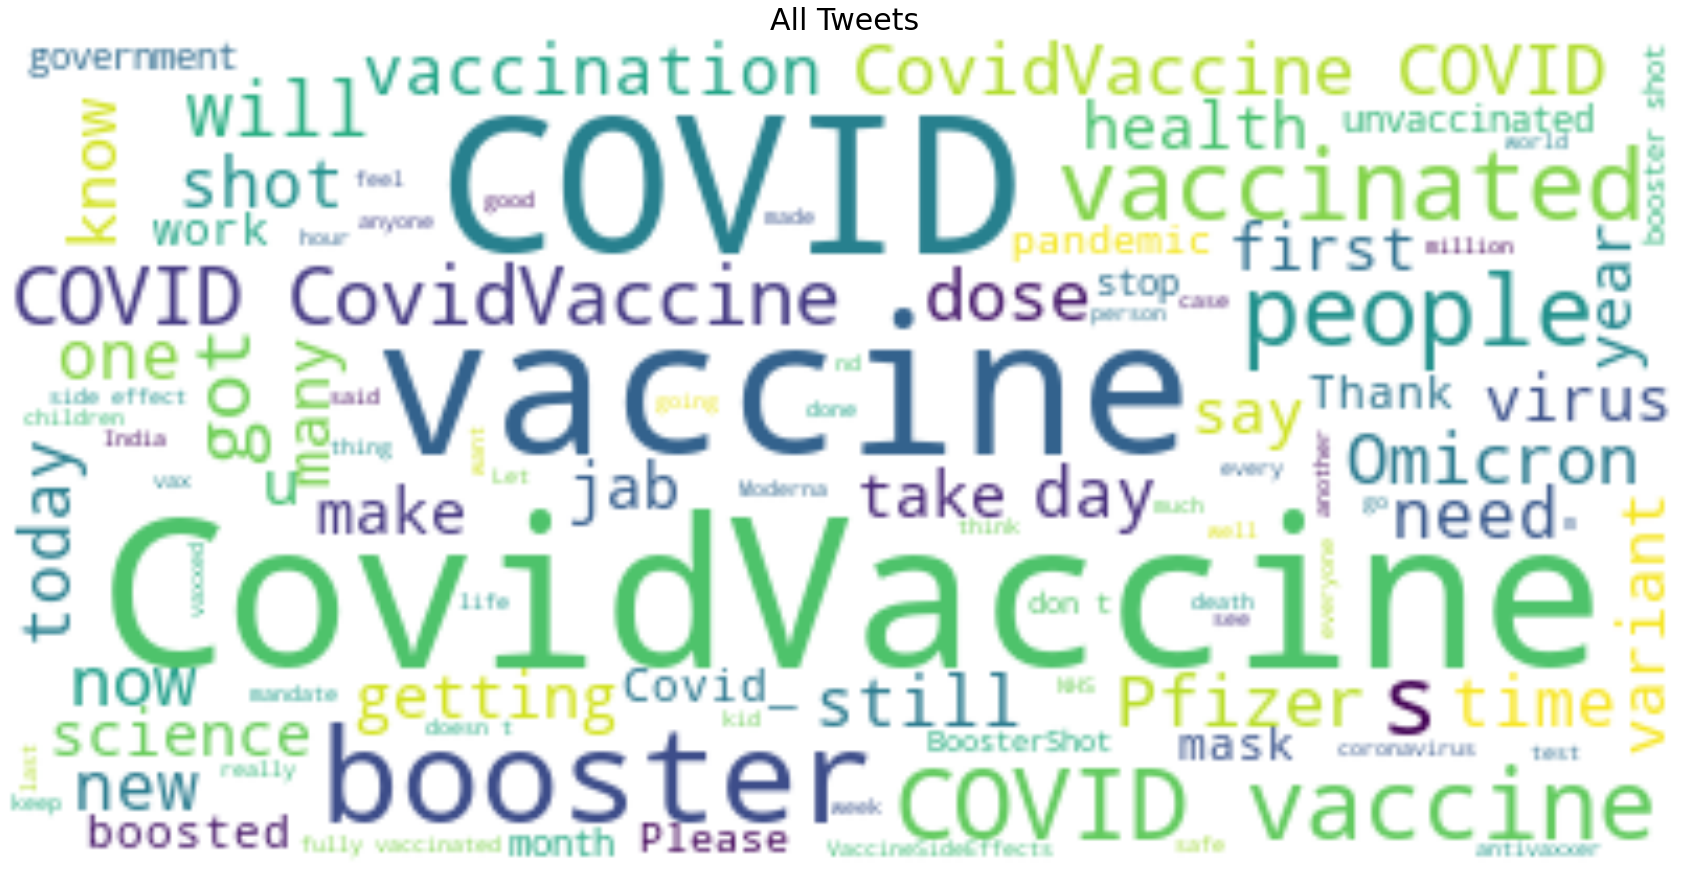

In [17]:

tweet_All = " ".join(review for review in vaccine_20_21_cleanedDF['Processed_Tweet'])

fig, ax = plt.subplots(1, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)


# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')
ax.set_title('All Tweets', fontsize=30)
ax.axis('off')


The Most Frequent words are 'CovidVaccine , Covid , Virus , Omicron ' Occurs almost in all the sentances , this along with the stop words wouldnt affect the performance of algorithms but words like Pfizer Moderna can help us determine the popular vaccine , and words such as "side effect  , death " can help us tag misinformed tweets about covid vaccine 

## ALGORITHMS

#### Basic NLTK Operations

In [18]:
sample = vaccine_20_21_cleanedDF['Processed_Tweet'][1]
print(sample)

#VADER 
#ROBERTA
#Compare and visualize 
#Pipeline for current tweet

Officially boosted! First done of Moderna after my original  doses of Pfizer! Let’s do this! covid booster COVIDBooster covid pfizer moderna


In [19]:
from nltk.tokenize import TweetTokenizer

tokens = TweetTokenizer().tokenize(sample)
print(tokens)

['Officially', 'boosted', '!', 'First', 'done', 'of', 'Moderna', 'after', 'my', 'original', 'doses', 'of', 'Pfizer', '!', 'Let', '’', 's', 'do', 'this', '!', 'covid', 'booster', 'COVIDBooster', 'covid', 'pfizer', 'moderna']


In [20]:
tagged = nltk.pos_tag(tokens)
print(tagged)

[('Officially', 'RB'), ('boosted', 'VBD'), ('!', '.'), ('First', 'NNP'), ('done', 'VBN'), ('of', 'IN'), ('Moderna', 'NNP'), ('after', 'IN'), ('my', 'PRP$'), ('original', 'JJ'), ('doses', 'NNS'), ('of', 'IN'), ('Pfizer', 'NNP'), ('!', '.'), ('Let', 'NNP'), ('’', 'NNP'), ('s', 'VB'), ('do', 'VBP'), ('this', 'DT'), ('!', '.'), ('covid', 'NN'), ('booster', 'NN'), ('COVIDBooster', 'NNP'), ('covid', 'NN'), ('pfizer', 'NN'), ('moderna', 'NN')]


In [21]:
#chunked into a sentance
Chunked_sentence_entities = nltk.chunk.ne_chunk(tagged)
Chunked_sentence_entities.pprint()

(S
  Officially/RB
  boosted/VBD
  !/.
  First/NNP
  done/VBN
  of/IN
  (GPE Moderna/NNP)
  after/IN
  my/PRP$
  original/JJ
  doses/NNS
  of/IN
  (GPE Pfizer/NNP)
  !/.
  Let/NNP
  ’/NNP
  s/VB
  do/VBP
  this/DT
  !/.
  covid/NN
  booster/NN
  COVIDBooster/NNP
  covid/NN
  pfizer/NN
  moderna/NN)


### TEXT BLOB

In [22]:
def TextBlob_score(tweet):
    # This polarity score is between -1 to 1
    polarity = TextBlob(tweet).sentiment.polarity
    if polarity < 0:
        sentiment = 'neg'
    elif polarity == 0:
        sentiment = 'neu'
    else:
        sentiment = 'pos'

    return polarity,sentiment
def TextBlob_subjectivity(tweet):
    
    subjectivity = TextBlob(tweet).sentiment.subjectivity
    return subjectivity


In [23]:
score,sentiment = TextBlob_score(sample)
print(score)
print(sentiment)

0.41796875
pos


In [24]:
sub = TextBlob_subjectivity(sample)
sub

0.5416666666666666

### VADER

In [25]:
Sentiment_analyzer = SentimentIntensityAnalyzer()
result_vader = Sentiment_analyzer.polarity_scores(sample)
result_vader


{'neg': 0.0, 'neu': 0.77, 'pos': 0.23, 'compound': 0.6884}

In [26]:
nltk.download("vader_lexicon")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/preethi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### We can see that Textblob classifies this sentance as a positive sentance , whereas vader classifies this as a neutral sentance but with a positive compound score 

## ROBERTA TRANSFORMERS

In [27]:
#Hugging face - it will pull the model weights that are stored - transfer learning , we don't have to retrain the model at all
#it downloads all of the weights
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [28]:
#vader results
print(sample)
Sentiment_analyzer.polarity_scores(sample)

Officially boosted! First done of Moderna after my original  doses of Pfizer! Let’s do this! covid booster COVIDBooster covid pfizer moderna


{'neg': 0.0, 'neu': 0.77, 'pos': 0.23, 'compound': 0.6884}

In [29]:
#Run on Roberta Model
#encoding the text
#'pt' - pytorch
encoded_text = tokenizer(sample,return_tensors='pt')
encoded_text

{'input_ids': tensor([[    0, 43188, 11416,  5934,   328,  1234,   626,     9, 13021,   102,
            71,   127,  1461,  1437, 19899,     9, 14475,  6315,   328,  2780,
            17,    27,    29,   109,    42,   328, 47268,   808, 27028,  6247,
         43814, 18935, 13991, 47268,   808,   181,   506,  6315,  2297,   102,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [30]:
output = model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[-3.3216,  0.8404,  2.6644]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [31]:
scores = output[0][0].detach().numpy()
scores


array([-3.3215566 ,  0.84040034,  2.6643655 ], dtype=float32)

In [32]:
softmax_scores = softmax(scores)
softmax_scores

array([0.00215989, 0.13865861, 0.8591815 ], dtype=float32)

In [33]:
scores_dict = {
    'roberta_neg' : softmax_scores[0],
    'roberta_neu' : softmax_scores[1],
    'roberta_pos' : softmax_scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0021598917, 'roberta_neu': 0.13865861, 'roberta_pos': 0.8591815}


### Combining all three models to compare results

In [34]:
#Tweet_vaders_sentiment.head()

In [35]:
def roberta_polarity_scores(sample):
    encoded = tokenizer(sample,return_tensors='pt')
    output = model(**encoded)
    scores=output[0][0].detach().numpy()
    softmax_scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : softmax_scores[0],
        'roberta_neu' : softmax_scores[1],
        'roberta_pos' : softmax_scores[2]
    }
    return scores_dict


In [36]:
#iterate over the dataset to calculate scores for each example
# some size of the text is too big for the roberta model to handle , we can skip those by adding try
result = {}
final_result={}
for i,row in tqdm(vaccine_20_21_cleanedDF.iterrows(),total=len(vaccine_20_21_cleanedDF)):
    try:
        tweet = row['Processed_Tweet']
        id = row['ID']

        vader_result = Sentiment_analyzer.polarity_scores(tweet)
        score = TextBlob(tweet).sentiment.polarity
        subjectivity = TextBlob(tweet).sentiment.subjectivity
        if score < 0:
            sentiment = 'neg'
        elif score == 0:
            sentiment = 'neu'
        else:
            sentiment = 'pos'
        
        vader_result_rename = {}
        for key , value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        

        roberta_result = roberta_polarity_scores(tweet)
        
        text_blob_result = {}
        Text_Blob_result = {'Text_blob_score' :score , 'Text_blob_subjectivity' :subjectivity,'Text_blob_sentiment' : sentiment}


        #combining three dictionaries
        combined_result = {**vader_result,**roberta_result,**Text_Blob_result}
        #break
        result[id] = combined_result
    except RuntimeError:
        print(f'Text size too long for id: {id}')



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/996 [00:00<?, ?it/s]

In [37]:
Tweet_Roberta =  pd.DataFrame(result).T
#Tweet_Roberta
Tweet_Roberta


,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,Text_blob_score,Text_blob_subjectivity,Text_blob_sentiment
0,0.0,1.0,0.0,0.0,0.022098,0.886437,0.091465,0.0,0.0,neu
1,0.0,0.77,0.23,0.6884,0.00216,0.138659,0.859182,0.417969,0.541667,pos
2,0.143,0.746,0.111,-0.3579,0.513322,0.387588,0.09909,0.0,0.0,neu
3,0.075,0.719,0.206,0.6581,0.635788,0.291731,0.072481,0.266667,0.55,pos
4,0.099,0.81,0.091,-0.1027,0.424267,0.533392,0.042342,0.05,0.2,pos
...,...,...,...,...,...,...,...,...,...,...
995,0.048,0.918,0.033,-0.1531,0.707394,0.277628,0.014977,0.0,0.0,neu
996,0.0,1.0,0.0,0.0,0.067002,0.907798,0.0252,0.0,0.0,neu
997,0.0,0.828,0.172,0.3612,0.930836,0.062937,0.006226,0.0,0.0,neu
998,0.118,0.882,0.0,-0.5859,0.850514,0.135886,0.0136,0.3,0.75,pos


In [38]:
Tweet_Roberta = Tweet_Roberta.reset_index().rename(columns={'index':'ID'})
Tweet_Roberta

,ID,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,Text_blob_score,Text_blob_subjectivity,Text_blob_sentiment
0,0,0.0,1.0,0.0,0.0,0.022098,0.886437,0.091465,0.0,0.0,neu
1,1,0.0,0.77,0.23,0.6884,0.00216,0.138659,0.859182,0.417969,0.541667,pos
2,2,0.143,0.746,0.111,-0.3579,0.513322,0.387588,0.09909,0.0,0.0,neu
3,3,0.075,0.719,0.206,0.6581,0.635788,0.291731,0.072481,0.266667,0.55,pos
4,4,0.099,0.81,0.091,-0.1027,0.424267,0.533392,0.042342,0.05,0.2,pos
...,...,...,...,...,...,...,...,...,...,...,...
991,995,0.048,0.918,0.033,-0.1531,0.707394,0.277628,0.014977,0.0,0.0,neu
992,996,0.0,1.0,0.0,0.0,0.067002,0.907798,0.0252,0.0,0.0,neu
993,997,0.0,0.828,0.172,0.3612,0.930836,0.062937,0.006226,0.0,0.0,neu
994,998,0.118,0.882,0.0,-0.5859,0.850514,0.135886,0.0136,0.3,0.75,pos


In [39]:
Tweet_Roberta = Tweet_Roberta.merge(vaccine_20_21_cleanedDF,how = 'left')

In [40]:
Tweet_Roberta

,ID,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,Text_blob_score,Text_blob_subjectivity,Text_blob_sentiment,Date,User,Tweet,Processed_Tweet,Tweet_URL,Location
0,0,0.0,1.0,0.0,0.0,0.022098,0.886437,0.091465,0.0,0.0,neu,2021-12-07,TPedherney,In line to get my booster #vaccine #Booster #P...,In line to get my booster vaccine Booster Pfizer,https://twitter.com/TPedherney/status/14683694...,"Burlington, ON"
1,1,0.0,0.77,0.23,0.6884,0.00216,0.138659,0.859182,0.417969,0.541667,pos,2021-12-07,cwillits30,Officially boosted! First done of Moderna afte...,Officially boosted! First done of Moderna afte...,https://twitter.com/cwillits30/status/14683628...,"Phoenix, AZ"
2,2,0.143,0.746,0.111,-0.3579,0.513322,0.387588,0.09909,0.0,0.0,neu,2021-12-07,MA_CEAL,#COVIDMythBustingTuesdays! Myth: Doesn’t the #...,COVIDMythBustingTuesdays! Myth: Doesn’t the CO...,https://twitter.com/MA_CEAL/status/14683620841...,"Boston, Massachusetts"
3,3,0.075,0.719,0.206,0.6581,0.635788,0.291731,0.072481,0.266667,0.55,pos,2021-12-07,WebAeneas,#vaccinated another great idea you can sue any...,vaccinated another great idea you can sue anyo...,https://twitter.com/WebAeneas/status/146835672...,
4,4,0.099,0.81,0.091,-0.1027,0.424267,0.533392,0.042342,0.05,0.2,pos,2021-12-07,TheAmirImani,"I don't know if this is a ""3 dose #vaccine"" or...","I don't know if this is a "" dose vaccine"" or a...",https://twitter.com/TheAmirImani/status/146835...,Toronto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,995,0.048,0.918,0.033,-0.1531,0.707394,0.277628,0.014977,0.0,0.0,neu,2021-12-04,AnoopChathoth,#Kerala has 1707 teaching and non teaching sta...,Kerala has teaching and non teaching staff wh...,https://twitter.com/AnoopChathoth/status/14669...,Bangalore Kannur Wayanad
992,996,0.0,1.0,0.0,0.0,0.067002,0.907798,0.0252,0.0,0.0,neu,2021-12-04,nemahinemla,Nisqually Indian Tribe mandates #CovidVaccine ...,Nisqually Indian Tribe mandates CovidVaccine f...,https://twitter.com/nemahinemla/status/1466985...,Nisqually
993,997,0.0,0.828,0.172,0.3612,0.930836,0.062937,0.006226,0.0,0.0,neu,2021-12-04,DonielOediv,i feel like throwing up 52 hours after taking ...,i feel like throwing up hours after taking se...,https://twitter.com/DonielOediv/status/1466984...,nz
994,998,0.118,0.882,0.0,-0.5859,0.850514,0.135886,0.0136,0.3,0.75,pos,2021-12-04,billlionnaire,What Covid denial don't get it. They have had ...,What Covid denial don't get it. They have had ...,https://twitter.com/billlionnaire/status/14669...,


In [41]:
Tweet_Roberta['Vader_Sentiment_Score'] =  Tweet_Roberta[["neg", "neu","pos"]].max(axis=1)
Tweet_Roberta_sentiment = Tweet_Roberta
Tweet_Roberta

,ID,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,Text_blob_score,Text_blob_subjectivity,Text_blob_sentiment,Date,User,Tweet,Processed_Tweet,Tweet_URL,Location,Vader_Sentiment_Score
0,0,0.0,1.0,0.0,0.0,0.022098,0.886437,0.091465,0.0,0.0,neu,2021-12-07,TPedherney,In line to get my booster #vaccine #Booster #P...,In line to get my booster vaccine Booster Pfizer,https://twitter.com/TPedherney/status/14683694...,"Burlington, ON",1.000
1,1,0.0,0.77,0.23,0.6884,0.00216,0.138659,0.859182,0.417969,0.541667,pos,2021-12-07,cwillits30,Officially boosted! First done of Moderna afte...,Officially boosted! First done of Moderna afte...,https://twitter.com/cwillits30/status/14683628...,"Phoenix, AZ",0.770
2,2,0.143,0.746,0.111,-0.3579,0.513322,0.387588,0.09909,0.0,0.0,neu,2021-12-07,MA_CEAL,#COVIDMythBustingTuesdays! Myth: Doesn’t the #...,COVIDMythBustingTuesdays! Myth: Doesn’t the CO...,https://twitter.com/MA_CEAL/status/14683620841...,"Boston, Massachusetts",0.746
3,3,0.075,0.719,0.206,0.6581,0.635788,0.291731,0.072481,0.266667,0.55,pos,2021-12-07,WebAeneas,#vaccinated another great idea you can sue any...,vaccinated another great idea you can sue anyo...,https://twitter.com/WebAeneas/status/146835672...,,0.719
4,4,0.099,0.81,0.091,-0.1027,0.424267,0.533392,0.042342,0.05,0.2,pos,2021-12-07,TheAmirImani,"I don't know if this is a ""3 dose #vaccine"" or...","I don't know if this is a "" dose vaccine"" or a...",https://twitter.com/TheAmirImani/status/146835...,Toronto,0.810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,995,0.048,0.918,0.033,-0.1531,0.707394,0.277628,0.014977,0.0,0.0,neu,2021-12-04,AnoopChathoth,#Kerala has 1707 teaching and non teaching sta...,Kerala has teaching and non teaching staff wh...,https://twitter.com/AnoopChathoth/status/14669...,Bangalore Kannur Wayanad,0.918
992,996,0.0,1.0,0.0,0.0,0.067002,0.907798,0.0252,0.0,0.0,neu,2021-12-04,nemahinemla,Nisqually Indian Tribe mandates #CovidVaccine ...,Nisqually Indian Tribe mandates CovidVaccine f...,https://twitter.com/nemahinemla/status/1466985...,Nisqually,1.000
993,997,0.0,0.828,0.172,0.3612,0.930836,0.062937,0.006226,0.0,0.0,neu,2021-12-04,DonielOediv,i feel like throwing up 52 hours after taking ...,i feel like throwing up hours after taking se...,https://twitter.com/DonielOediv/status/1466984...,nz,0.828
994,998,0.118,0.882,0.0,-0.5859,0.850514,0.135886,0.0136,0.3,0.75,pos,2021-12-04,billlionnaire,What Covid denial don't get it. They have had ...,What Covid denial don't get it. They have had ...,https://twitter.com/billlionnaire/status/14669...,,0.882


In [42]:
Tweet_Roberta_sentiment["neg"] = pd.to_numeric(Tweet_Roberta_sentiment["neg"])
Tweet_Roberta_sentiment["pos"] = pd.to_numeric(Tweet_Roberta_sentiment["pos"])
Tweet_Roberta_sentiment["neu"] = pd.to_numeric(Tweet_Roberta_sentiment["neu"])
Tweet_Roberta_sentiment["compound"] = pd.to_numeric(Tweet_Roberta_sentiment["compound"])
Tweet_Roberta_sentiment["roberta_neg"] = pd.to_numeric(Tweet_Roberta_sentiment["roberta_neg"])
Tweet_Roberta_sentiment["roberta_pos"] = pd.to_numeric(Tweet_Roberta_sentiment["roberta_pos"])
Tweet_Roberta_sentiment["roberta_neu"] = pd.to_numeric(Tweet_Roberta_sentiment["roberta_neu"])
Tweet_Roberta_sentiment['Vader_Sentiment'] = Tweet_Roberta_sentiment[["neg", "neu","pos"]].idxmax(axis=1)
Tweet_Roberta_sentiment

,ID,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,Text_blob_score,Text_blob_subjectivity,Text_blob_sentiment,Date,User,Tweet,Processed_Tweet,Tweet_URL,Location,Vader_Sentiment_Score,Vader_Sentiment
0,0,0.000,1.000,0.000,0.0000,0.022098,0.886437,0.091465,0.0,0.0,neu,2021-12-07,TPedherney,In line to get my booster #vaccine #Booster #P...,In line to get my booster vaccine Booster Pfizer,https://twitter.com/TPedherney/status/14683694...,"Burlington, ON",1.000,neu
1,1,0.000,0.770,0.230,0.6884,0.002160,0.138659,0.859182,0.417969,0.541667,pos,2021-12-07,cwillits30,Officially boosted! First done of Moderna afte...,Officially boosted! First done of Moderna afte...,https://twitter.com/cwillits30/status/14683628...,"Phoenix, AZ",0.770,neu
2,2,0.143,0.746,0.111,-0.3579,0.513322,0.387588,0.099090,0.0,0.0,neu,2021-12-07,MA_CEAL,#COVIDMythBustingTuesdays! Myth: Doesn’t the #...,COVIDMythBustingTuesdays! Myth: Doesn’t the CO...,https://twitter.com/MA_CEAL/status/14683620841...,"Boston, Massachusetts",0.746,neu
3,3,0.075,0.719,0.206,0.6581,0.635788,0.291731,0.072481,0.266667,0.55,pos,2021-12-07,WebAeneas,#vaccinated another great idea you can sue any...,vaccinated another great idea you can sue anyo...,https://twitter.com/WebAeneas/status/146835672...,,0.719,neu
4,4,0.099,0.810,0.091,-0.1027,0.424267,0.533392,0.042342,0.05,0.2,pos,2021-12-07,TheAmirImani,"I don't know if this is a ""3 dose #vaccine"" or...","I don't know if this is a "" dose vaccine"" or a...",https://twitter.com/TheAmirImani/status/146835...,Toronto,0.810,neu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,995,0.048,0.918,0.033,-0.1531,0.707394,0.277628,0.014977,0.0,0.0,neu,2021-12-04,AnoopChathoth,#Kerala has 1707 teaching and non teaching sta...,Kerala has teaching and non teaching staff wh...,https://twitter.com/AnoopChathoth/status/14669...,Bangalore Kannur Wayanad,0.918,neu
992,996,0.000,1.000,0.000,0.0000,0.067002,0.907798,0.025200,0.0,0.0,neu,2021-12-04,nemahinemla,Nisqually Indian Tribe mandates #CovidVaccine ...,Nisqually Indian Tribe mandates CovidVaccine f...,https://twitter.com/nemahinemla/status/1466985...,Nisqually,1.000,neu
993,997,0.000,0.828,0.172,0.3612,0.930836,0.062937,0.006226,0.0,0.0,neu,2021-12-04,DonielOediv,i feel like throwing up 52 hours after taking ...,i feel like throwing up hours after taking se...,https://twitter.com/DonielOediv/status/1466984...,nz,0.828,neu
994,998,0.118,0.882,0.000,-0.5859,0.850514,0.135886,0.013600,0.3,0.75,pos,2021-12-04,billlionnaire,What Covid denial don't get it. They have had ...,What Covid denial don't get it. They have had ...,https://twitter.com/billlionnaire/status/14669...,,0.882,neu


In [98]:
Tweet_Roberta_sentiment['Roberta_Sentiment_Score'] =  Tweet_Roberta_sentiment[["roberta_neg", "roberta_neu","roberta_pos"]].max(axis=1)
Tweet_Roberta_sentiment_1 = Tweet_Roberta_sentiment
Tweet_Roberta_sentiment_1['Roberta_Sentiment'] = Tweet_Roberta_sentiment[["roberta_neg", "roberta_neu","roberta_pos"]].idxmax(axis=1)
Tweet_Roberta_sentiment_1.head()

,ID,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,Text_blob_score,Text_blob_subjectivity,...,Date,User,Tweet,Processed_Tweet,Tweet_URL,Location,Vader_Sentiment_Score,Vader_Sentiment,Roberta_Sentiment_Score,Roberta_Sentiment
0,0,0.000,1.000,0.000,0.0000,0.022098,0.886437,0.091465,0.0,0.0,...,2021-12-07,TPedherney,In line to get my booster #vaccine #Booster #P...,In line to get my booster vaccine Booster Pfizer,https://twitter.com/TPedherney/status/14683694...,"Burlington, ON",1.000,neu,0.886437,roberta_neu
1,1,0.000,0.770,0.230,0.6884,0.002160,0.138659,0.859182,0.417969,0.541667,...,2021-12-07,cwillits30,Officially boosted! First done of Moderna afte...,Officially boosted! First done of Moderna afte...,https://twitter.com/cwillits30/status/14683628...,"Phoenix, AZ",0.770,neu,0.859182,roberta_pos
2,2,0.143,0.746,0.111,-0.3579,0.513322,0.387588,0.099090,0.0,0.0,...,2021-12-07,MA_CEAL,#COVIDMythBustingTuesdays! Myth: Doesn’t the #...,COVIDMythBustingTuesdays! Myth: Doesn’t the CO...,https://twitter.com/MA_CEAL/status/14683620841...,"Boston, Massachusetts",0.746,neu,0.513322,roberta_neg
3,3,0.075,0.719,0.206,0.6581,0.635788,0.291731,0.072481,0.266667,0.55,...,2021-12-07,WebAeneas,#vaccinated another great idea you can sue any...,vaccinated another great idea you can sue anyo...,https://twitter.com/WebAeneas/status/146835672...,,0.719,neu,0.635788,roberta_neg
4,4,0.099,0.810,0.091,-0.1027,0.424267,0.533392,0.042342,0.05,0.2,...,2021-12-07,TheAmirImani,"I don't know if this is a ""3 dose #vaccine"" or...","I don't know if this is a "" dose vaccine"" or a...",https://twitter.com/TheAmirImani/status/146835...,Toronto,0.810,neu,0.533392,roberta_neu


In [44]:
sentiment_counts = Tweet_Roberta_sentiment_1.groupby(['Vader_Sentiment']).size()
print(sentiment_counts)



Vader_Sentiment
neg      4
neu    982
pos     10
dtype: int64


<AxesSubplot:>

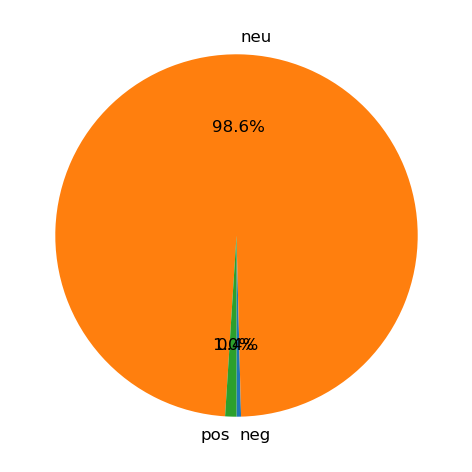

In [45]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")


In [46]:
sentiment_counts_roberta = Tweet_Roberta_sentiment_1.groupby(['Roberta_Sentiment']).size()
print(sentiment_counts_roberta)

Roberta_Sentiment
roberta_neg    484
roberta_neu    334
roberta_pos    178
dtype: int64


<AxesSubplot:>

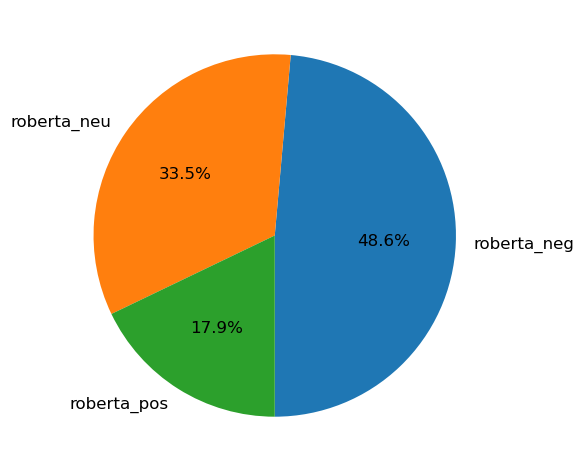

In [47]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts_roberta.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

In [48]:
sentiment_counts_text_blob = Tweet_Roberta_sentiment_1.groupby(['Text_blob_sentiment']).size()
print(sentiment_counts_text_blob)

Text_blob_sentiment
neg    256
neu    292
pos    448
dtype: int64


<AxesSubplot:>

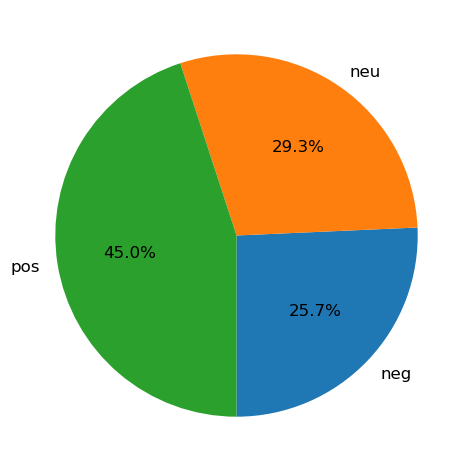

In [49]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts_text_blob.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

In [127]:
# Rearrange Columns

col_list = Tweet_Roberta_sentiment_1.columns.tolist()
cols = col_list[:1] + col_list[11:19] + col_list[8:11] + col_list[19:]
cols


['ID',
 'Date',
 'User',
 'Tweet',
 'Processed_Tweet',
 'Tweet_URL',
 'Location',
 'Vader_Sentiment_Score',
 'Vader_Sentiment',
 'Text_blob_score',
 'Text_blob_subjectivity',
 'Text_blob_sentiment',
 'Roberta_Sentiment_Score',
 'Roberta_Sentiment']

In [128]:
sentiment_df = Tweet_Roberta_sentiment_1[cols]
sentiment_df

,ID,Date,User,Tweet,Processed_Tweet,Tweet_URL,Location,Vader_Sentiment_Score,Vader_Sentiment,Text_blob_score,Text_blob_subjectivity,Text_blob_sentiment,Roberta_Sentiment_Score,Roberta_Sentiment
0,0,2021-12-07,TPedherney,In line to get my booster #vaccine #Booster #P...,In line to get my booster vaccine Booster Pfizer,https://twitter.com/TPedherney/status/14683694...,"Burlington, ON",1.000,neu,0.0,0.0,neu,0.886437,roberta_neu
1,1,2021-12-07,cwillits30,Officially boosted! First done of Moderna afte...,Officially boosted! First done of Moderna afte...,https://twitter.com/cwillits30/status/14683628...,"Phoenix, AZ",0.770,neu,0.417969,0.541667,pos,0.859182,roberta_pos
2,2,2021-12-07,MA_CEAL,#COVIDMythBustingTuesdays! Myth: Doesn’t the #...,COVIDMythBustingTuesdays! Myth: Doesn’t the CO...,https://twitter.com/MA_CEAL/status/14683620841...,"Boston, Massachusetts",0.746,neu,0.0,0.0,neu,0.513322,roberta_neg
3,3,2021-12-07,WebAeneas,#vaccinated another great idea you can sue any...,vaccinated another great idea you can sue anyo...,https://twitter.com/WebAeneas/status/146835672...,,0.719,neu,0.266667,0.55,pos,0.635788,roberta_neg
4,4,2021-12-07,TheAmirImani,"I don't know if this is a ""3 dose #vaccine"" or...","I don't know if this is a "" dose vaccine"" or a...",https://twitter.com/TheAmirImani/status/146835...,Toronto,0.810,neu,0.05,0.2,pos,0.533392,roberta_neu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,995,2021-12-04,AnoopChathoth,#Kerala has 1707 teaching and non teaching sta...,Kerala has teaching and non teaching staff wh...,https://twitter.com/AnoopChathoth/status/14669...,Bangalore Kannur Wayanad,0.918,neu,0.0,0.0,neu,0.707394,roberta_neg
992,996,2021-12-04,nemahinemla,Nisqually Indian Tribe mandates #CovidVaccine ...,Nisqually Indian Tribe mandates CovidVaccine f...,https://twitter.com/nemahinemla/status/1466985...,Nisqually,1.000,neu,0.0,0.0,neu,0.907798,roberta_neu
993,997,2021-12-04,DonielOediv,i feel like throwing up 52 hours after taking ...,i feel like throwing up hours after taking se...,https://twitter.com/DonielOediv/status/1466984...,nz,0.828,neu,0.0,0.0,neu,0.930836,roberta_neg
994,998,2021-12-04,billlionnaire,What Covid denial don't get it. They have had ...,What Covid denial don't get it. They have had ...,https://twitter.com/billlionnaire/status/14669...,,0.882,neu,0.3,0.75,pos,0.850514,roberta_neg


In [129]:
#rearrange 
sentiment_df.to_csv(r'data/sentiment.csv', encoding='utf-8')

### VADER SENTIMENT WORD CLOUD

In [126]:

# Function for creating WordClouds
def cloud_of_Words(tweet_cat,title):
    forcloud = ' '.join([tweet for tweet in tweet_cat])
    wordcloud = WordCloud(width =500,height = 300,random_state =5,max_font_size=110,background_color="white").generate(forcloud)
    plt.imshow(wordcloud, interpolation ='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
    plt.figure(figsize = (10,10))

In [130]:
# categorized tweets 
VADER_positive_tweet =  sentiment_df[sentiment_df['Vader_Sentiment'] == 'pos']['Processed_Tweet']
VADER_negative_tweet =  sentiment_df[sentiment_df['Vader_Sentiment'] == 'neg']['Processed_Tweet']
VADER_neutral_tweet =  sentiment_df[sentiment_df['Vader_Sentiment'] == 'neu']['Processed_Tweet']


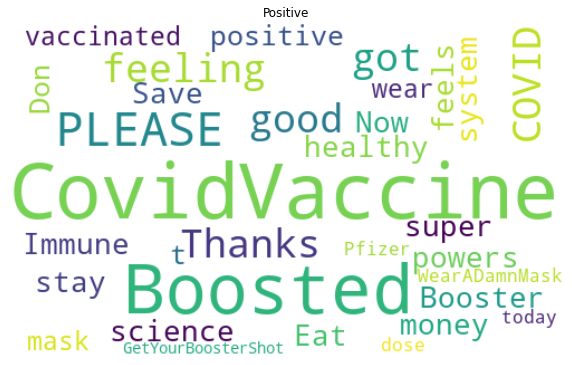

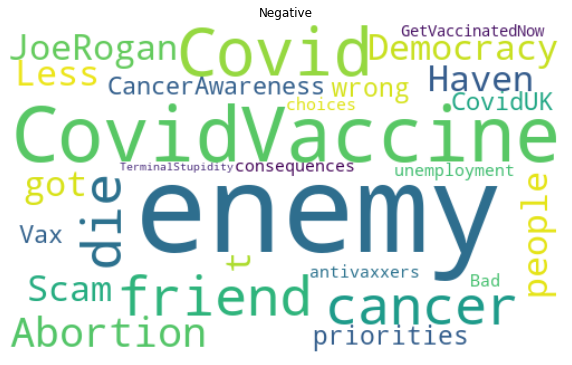

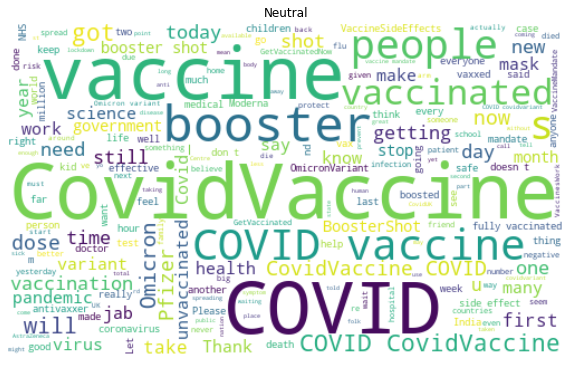

<Figure size 720x720 with 0 Axes>

In [131]:
plt.figure(figsize = (10,10))
# Creating wordclouds for positive, negative, neutral tweets
cloud_of_Words(VADER_positive_tweet, 'Positive')
cloud_of_Words(VADER_negative_tweet, 'Negative')
cloud_of_Words(VADER_neutral_tweet, 'Neutral')

### TEXT BLOB SENTIMENT WORD CLOUD

In [132]:
# categorized tweets 
BLOB_positive_tweet =  sentiment_df[sentiment_df['Text_blob_sentiment'] == 'pos']['Processed_Tweet']
BLOB_negative_tweet =  sentiment_df[sentiment_df['Text_blob_sentiment'] == 'neg']['Processed_Tweet']
BLOB_neutral_tweet =  sentiment_df[sentiment_df['Text_blob_sentiment'] == 'neu']['Processed_Tweet']


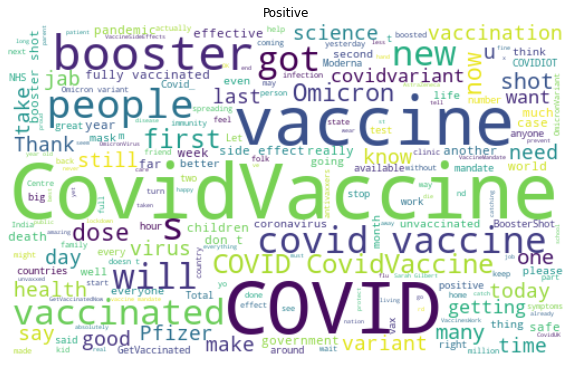

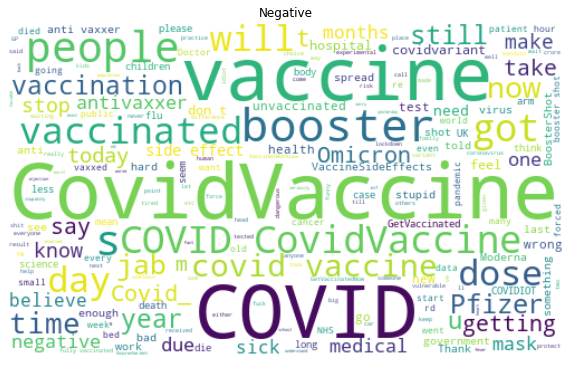

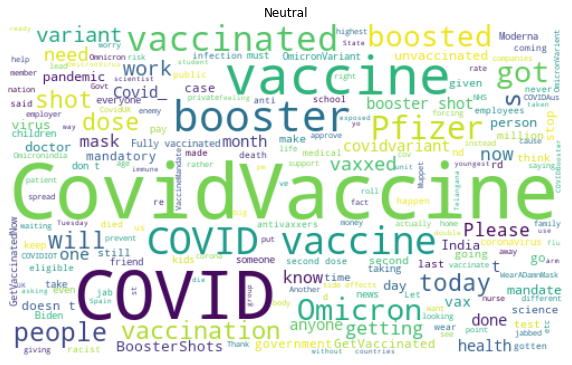

<Figure size 720x720 with 0 Axes>

In [133]:
plt.figure(figsize = (10,10))
# Creating wordclouds for positive, negative, neutral tweets
cloud_of_Words(BLOB_positive_tweet, 'Positive')
cloud_of_Words(BLOB_negative_tweet, 'Negative')
cloud_of_Words(BLOB_neutral_tweet, 'Neutral')

### ROBERTA SENTIMENT WORD CLOUD

In [134]:
RoBERTa_positive_tweet =  sentiment_df[sentiment_df['Roberta_Sentiment'] == 'roberta_pos']['Processed_Tweet']
RoBERTa_negative_tweet =  sentiment_df[sentiment_df['Roberta_Sentiment'] == 'roberta_neg']['Processed_Tweet']
RoBERTa_neutral_tweet =  sentiment_df[sentiment_df['Roberta_Sentiment'] == 'roberta_neu']['Processed_Tweet']


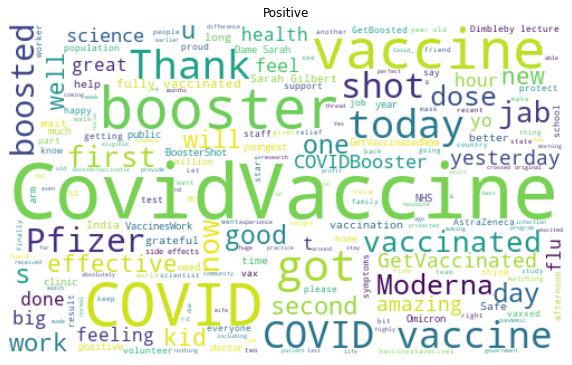

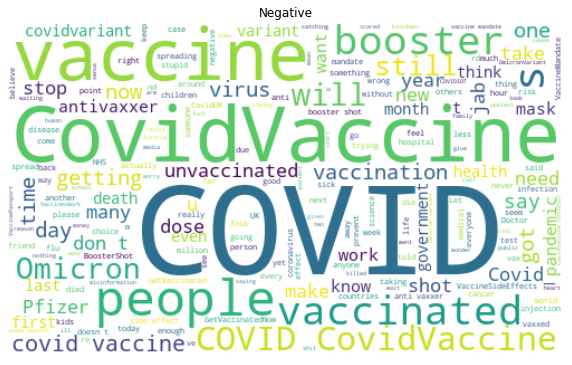

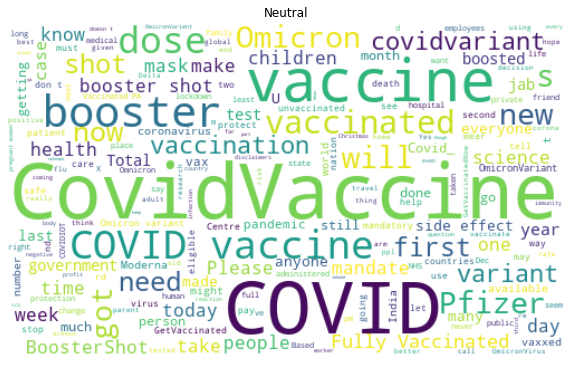

<Figure size 720x720 with 0 Axes>

In [135]:
plt.figure(figsize = (10,10))
# Creating wordclouds for positive, negative, neutral tweets
cloud_of_Words(RoBERTa_positive_tweet, 'Positive')
cloud_of_Words(RoBERTa_negative_tweet, 'Negative')
cloud_of_Words(RoBERTa_neutral_tweet, 'Neutral')

## Manufacturers 

In [137]:
def GetManufacturer(tweet):
    tweet = tweet.lower()
    if 'moderna' in tweet:
        if 'astra' in tweet: 
            return '2'
        elif 'pfizer' in tweet:
            return '2'
        else: 
            return 'mo'
    elif 'pfizer' in tweet:
        if 'astra' in tweet:
            return '2'
        else:
            return 'pf'
    elif 'astra' in tweet:
        return 'az'
    else:
        return '0'

In [138]:
df= sentiment_df['Processed_Tweet'].apply(GetManufacturer)
df.tail()

991     0
992     0
993    pf
994     0
995     0
Name: Processed_Tweet, dtype: object

In [139]:
df

0      pf
1       2
2       0
3       0
4       0
       ..
991     0
992     0
993    pf
994     0
995     0
Name: Processed_Tweet, Length: 996, dtype: object

In [140]:
# creating reference tags for 5 vaccines -> Pfizer, Covaxin(Bharat Biotech), Sputnik,AstraZenca(Covishield),Moderna
pfizer_refs = ["Pfizer","pfizer","Pfizer–BioNTech","pfizer-bioNtech","BioNTech","biontech"]
bbiotech_refs = ["covax","covaxin","Covax","Covaxin","Bharat Biotech","bharat biotech","BharatBiotech","bharatbiotech"]
sputnik_refs = ["russia","sputnik","Sputnik","V"]
astra_refs = ['sii','SII','adar poonawalla','Covishield','covishield','astra','zenca','Oxford–AstraZeneca','astrazenca','oxford-astrazenca','serum institiute']
moderna_refs = ['moderna','Moderna','mRNA-1273','Spikevax']